In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-03-24 20:36:31.160746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## PREPARAR LOS DATOS

In [9]:
train_data = pd.read_csv('train.csv')

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_labels = train_data['Survived']

In [12]:
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## ELIJO LOS DATOS RELEVANTES 

In [13]:
columns_to_extract = ['Pclass','Sex','SibSp', 'Parch', 'Fare', 'Cabin','Embarked']
columns_to_extract

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [14]:
train_features = train_data[columns_to_extract]
train_features

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,1,0,7.2500,NaN,S
1,1,female,1,0,71.2833,C85,C
2,3,female,0,0,7.9250,NaN,S
3,1,female,1,0,53.1000,C123,S
4,3,male,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,NaN,S
887,1,female,0,0,30.0000,B42,S
888,3,female,1,2,23.4500,NaN,S
889,1,male,0,0,30.0000,C148,C


## separo mis datos en valores booleanos, es decir por ej: en Pclass tengo las clases 1 2 3, ahora vamos a crear tres columnas  para cada clase y vamos a rellenar las filas con valores booleanos

In [15]:
#Pclass
train_features = pd.concat([train_features, pd.get_dummies(train_features['Pclass'], prefix='Pclass')], axis=1)
train_features.drop(['Pclass'], axis=1, inplace=True)
#Embarked
train_features = pd.concat([train_features, pd.get_dummies(train_features['Embarked'], prefix='Embarked')], axis=1)
train_features.drop(['Embarked'], axis=1, inplace=True)
#Sex
train_features = pd.concat([train_features, pd.get_dummies(train_features['Sex'], prefix='Sex')], axis=1)
train_features.drop(['Sex'], axis=1, inplace=True)

In [16]:
train_features

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,7.2500,NaN,False,False,True,False,False,True,False,True
1,1,0,71.2833,C85,True,False,False,True,False,False,True,False
2,0,0,7.9250,NaN,False,False,True,False,False,True,True,False
3,1,0,53.1000,C123,True,False,False,False,False,True,True,False
4,0,0,8.0500,NaN,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,NaN,False,True,False,False,False,True,False,True
887,0,0,30.0000,B42,True,False,False,False,False,True,True,False
888,1,2,23.4500,NaN,False,False,True,False,False,True,True,False
889,0,0,30.0000,C148,True,False,False,True,False,False,False,True


In [17]:
train_features['Cabin1'] = train_features['Cabin'].astype(str).str[0]
train_features['Cabin1'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [18]:
train_features['Cabin1'].value_counts()

Cabin1
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [19]:
train_features['Cabin'] = train_features['Cabin'].fillna('Z')

In [20]:
train_features['Cabin1'] = train_features['Cabin'].astype(str).str[0]
train_features

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1
0,1,0,7.2500,Z,False,False,True,False,False,True,False,True,Z
1,1,0,71.2833,C85,True,False,False,True,False,False,True,False,C
2,0,0,7.9250,Z,False,False,True,False,False,True,True,False,Z
3,1,0,53.1000,C123,True,False,False,False,False,True,True,False,C
4,0,0,8.0500,Z,False,False,True,False,False,True,False,True,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,Z,False,True,False,False,False,True,False,True,Z
887,0,0,30.0000,B42,True,False,False,False,False,True,True,False,B
888,1,2,23.4500,Z,False,False,True,False,False,True,True,False,Z
889,0,0,30.0000,C148,True,False,False,True,False,False,False,True,C


In [21]:
#Cabin
train_features = pd.concat([train_features, pd.get_dummies(train_features['Cabin1'], prefix='Cabin1')], axis=1)
train_features.drop(['Cabin1'], axis=1, inplace=True)
train_features.drop(['Cabin'], axis=1, inplace=True)
train_features

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin1_Z
0,1,0,7.2500,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,1,0,71.2833,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False
2,0,0,7.9250,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True
3,1,0,53.1000,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False
4,0,0,8.0500,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
887,0,0,30.0000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False
888,1,2,23.4500,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True
889,0,0,30.0000,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False


In [22]:
train_features.drop(['Cabin1_T'], axis=1, inplace=True)
train_features

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_Z
0,1,0,7.2500,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True
1,1,0,71.2833,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
2,0,0,7.9250,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True
3,1,0,53.1000,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
4,0,0,8.0500,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
887,0,0,30.0000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False
888,1,2,23.4500,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True
889,0,0,30.0000,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False


In [23]:
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
train_features = train_features.replace({True: 1, False: 0})
train_features

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_Z
0,1,0,7.2500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,0,71.2833,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,7.9250,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
3,1,0,53.1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
887,0,0,30.0000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
888,1,2,23.4500,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
889,0,0,30.0000,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((None,19,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [30]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [31]:
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.8978 - accuracy: 0.5744 - val_loss: 0.6010 - val_accuracy: 0.7709
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.6390 - val_loss: 0.5752 - val_accuracy: 0.7877
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.6770 - val_loss: 0.5274 - val_accuracy: 0.7709
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6924 - val_loss: 0.5149 - val_accuracy: 0.7709
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.7177 - val_loss: 0.4831 - val_accuracy: 0.7933
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.7037 - val_loss: 0.4641 - val_accuracy: 0.8268
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.7233 - val_loss: 0.4502 - val_accuracy: 0.8045
Epoch 8/100


In [32]:
test_loss, test_acc = model.evaluate(train_features,train_labels, verbose=2)

28/28 - 0s - loss: 0.4130 - accuracy: 0.8204 - 55ms/epoch - 2ms/step


## GRAFICAS


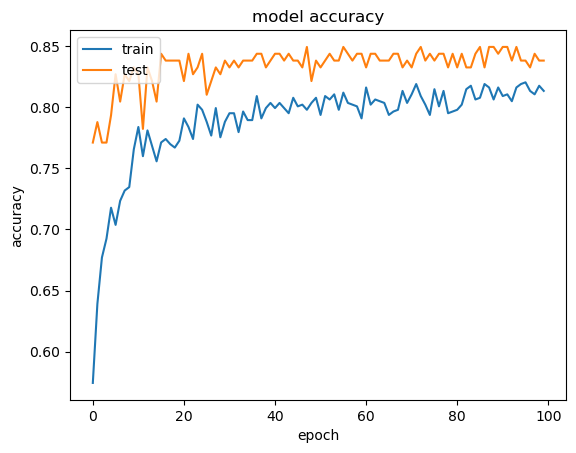

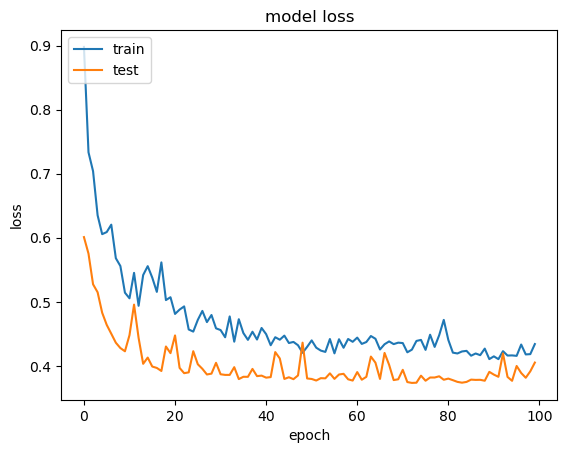

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## PREDICICONES

In [38]:
test_data = pd.read_csv('test.csv')

In [47]:
columns_to_extract = ['Pclass', 'Sex', 'SibSp', 'Parch','Fare' , 'Cabin' ,'Embarked']
test_features = test_data[columns_to_extract]
#Pclass
test_features = pd.concat([test_features, pd.get_dummies(test_features['Pclass'], prefix='Pclass')], axis=1)
test_features.drop(['Pclass'], axis=1, inplace=True)
#Embarked
test_features = pd.concat([test_features, pd.get_dummies(test_features['Embarked'], prefix='Embarked')], axis=1)
test_features.drop(['Embarked'], axis=1, inplace=True)
#Sex
test_features = pd.concat([test_features, pd.get_dummies(test_features['Sex'], prefix='Sex')], axis=1)
test_features.drop(['Sex'], axis=1, inplace=True)

test_features['Cabin'] = test_features['Cabin'].fillna('Z')
test_features['Cabin1'] = test_features['Cabin'].astype(str).str[0]
test_features = pd.concat([test_features, pd.get_dummies(test_features['Cabin1'], prefix='Cabin1')], axis=1)
test_features.drop(['Cabin1'], axis=1, inplace=True)
test_features.drop(['Cabin'], axis=1, inplace=True)

In [48]:
test_features = test_features.replace({True: 1, False: 0})
test_features

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_Z
0,0,0,7.8292,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1,0,7.0000,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
2,0,0,9.6875,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,0,8.6625,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
4,1,1,12.2875,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
414,0,0,108.9000,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
415,0,0,7.2500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
416,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [49]:
predictions = model.predict(test_features)

14/14 [==============================] - 0s 1ms/step


In [50]:
predictions

array([[9.43960845e-02],
       [4.62231934e-01],
       [7.94004649e-02],
       [1.20623462e-01],
       [4.42549109e-01],
       [1.21117570e-01],
       [7.52951920e-01],
       [1.69975191e-01],
       [6.38811767e-01],
       [1.18080541e-01],
       [1.20550364e-01],
       [2.59918898e-01],
       [9.85609651e-01],
       [1.37764812e-01],
       [9.89519358e-01],
       [9.60392952e-01],
       [9.64543149e-02],
       [1.39861375e-01],
       [4.23461139e-01],
       [6.38973892e-01],
       [2.58499563e-01],
       [1.37195170e-01],
       [8.99623752e-01],
       [2.61994481e-01],
       [6.33417547e-01],
       [1.23072177e-01],
       [9.73025203e-01],
       [1.39861375e-01],
       [3.84892404e-01],
       [1.76258206e-01],
       [1.37764826e-01],
       [1.09391414e-01],
       [2.98358768e-01],
       [2.99072236e-01],
       [2.78198153e-01],
       [1.39902368e-01],
       [4.41321164e-01],
       [4.45902526e-01],
       [1.21642470e-01],
       [2.45717883e-01],


In [51]:
out = predictions.round().astype(int)

/var/folders/p5/pgqnd54907ndt43mypshrgtw0000gn/T/ipykernel_9821/3477204499.py:1: RuntimeWarning: invalid value encountered in cast
  out = predictions.round().astype(int)


In [52]:
out

array([[                   0],
       [                   0],
       [                   0],
       [                   0],
       [                   0],
       [                   0],
       [                   1],
       [                   0],
       [                   1],
       [                   0],
       [                   0],
       [                   0],
       [                   1],
       [                   0],
       [                   1],
       [                   1],
       [                   0],
       [                   0],
       [                   0],
       [                   1],
       [                   0],
       [                   0],
       [                   1],
       [                   0],
       [                   1],
       [                   0],
       [                   1],
       [                   0],
       [                   0],
       [                   0],
       [                   0],
       [                   0],
       [